# Лабораторная работа №6: Регрессия

Модель для прогнозирования цен на недвижимость в Бостоне.

## 1. Подготовка и импорт библиотек

### Подключим необходимые библиотеки

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

### Загрузка данных


In [257]:
try:
    dysfunctional_niggers = pd.read_csv('boston.csv')
    print(dysfunctional_niggers.head())
except FileNotFoundError:
    print("Check file existance")

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


### 2. Проверка типов

In [258]:
dysfunctional_niggers.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Вывод: Все столбцы имеют числовые типы (float64), что подходит для анализа.

### 3. Проверка на отсутствующие данные
Проверим, есть ли пропуски в данных, и если есть, заполним их **медианным значением**.

In [259]:
dysfunctional_niggers.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Вывод: В данном наборе данных отсутствующие значения отсутствуют.

### 4. Расчет корреляционной матрицы
Посчитаем **коэффициент корреляции Пирсона** для всех пар признаков.

In [282]:
corr_matrix = dysfunctional_niggers.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### 5. Визуализация корреляционной матрицы (тепловая карта)
Построим тепловую карту для наглядного представления корреляций

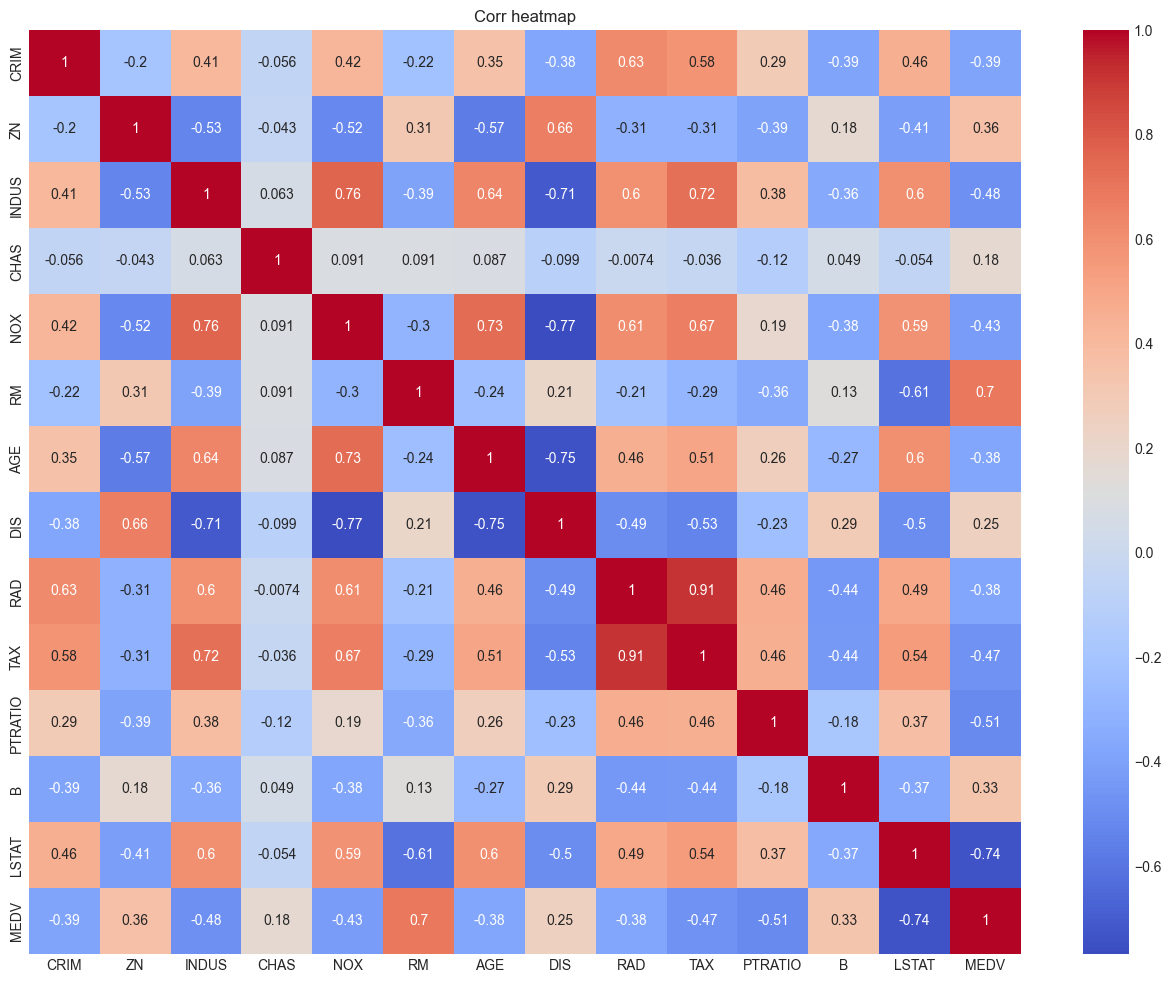

In [261]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corr heatmap')
plt.show()

### 6. Выбор признаков для модели
Выберем 5 признаков, которые наиболее сильно коррелируют с целевым признаком по модулю.

In [262]:
corr_with_sign = corr_matrix['MEDV'].abs().sort_values(ascending=False)
corr_with_sign.head(7)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
Name: MEDV, dtype: float64

In [263]:
selected_features = corr_with_sign[1:6].index.tolist()
print(f"Choosed: {selected_features}")

Choosed: ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']


Выбрал самые близкие по модулю к 1(без целевого признака), потому что чем ближе 
модуль коэффициента корреляции к 1, тем сильнее прослеживается зависимость между признаками.

### 7. Построение диаграмм рассеяния
Для каждого выбранного признака построим диаграмму рассеяния в паре с медианной.


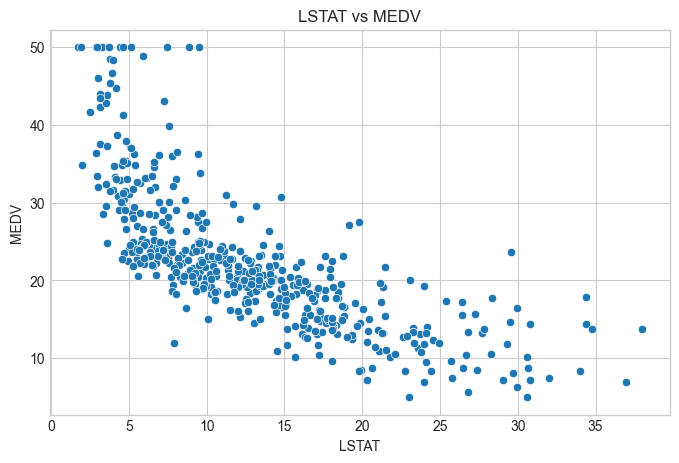

In [264]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dysfunctional_niggers['LSTAT'], y=dysfunctional_niggers['MEDV'])
plt.title(f'LSTAT vs MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

Видно: чем выше процент населения с низким статусом, тем ниже цена.

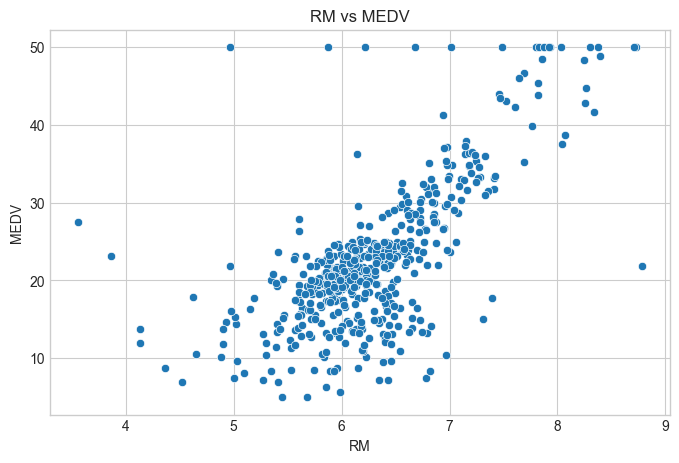

In [265]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dysfunctional_niggers['RM'], y=dysfunctional_niggers['MEDV'])
plt.title(f'RM vs MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

Видно: цена увеличивается в зависимости от комнат.

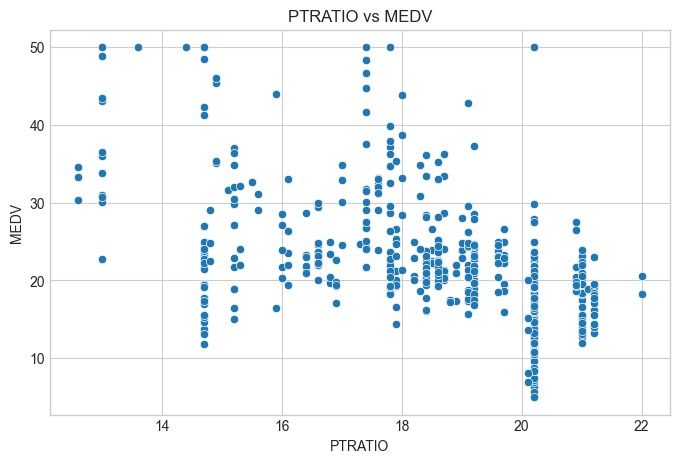

In [266]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dysfunctional_niggers['PTRATIO'], y=dysfunctional_niggers['MEDV'])
plt.title(f'PTRATIO vs MEDV')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.show()

Видно: при признаке PTRATIO около 20.2 цена резко снижается. При его значении > 18 уменьшается средняя цена.  

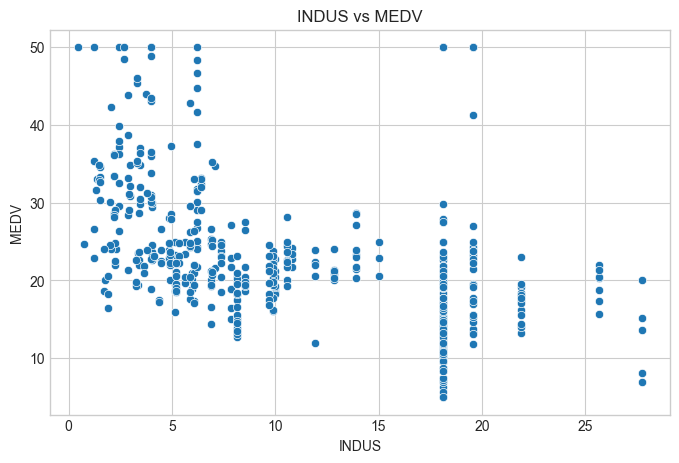

In [267]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dysfunctional_niggers['INDUS'], y=dysfunctional_niggers['MEDV'])
plt.title(f'INDUS vs MEDV')
plt.xlabel('INDUS')
plt.ylabel('MEDV')
plt.show()

Видно: при увеличении признака indus, цена умеренно снижается

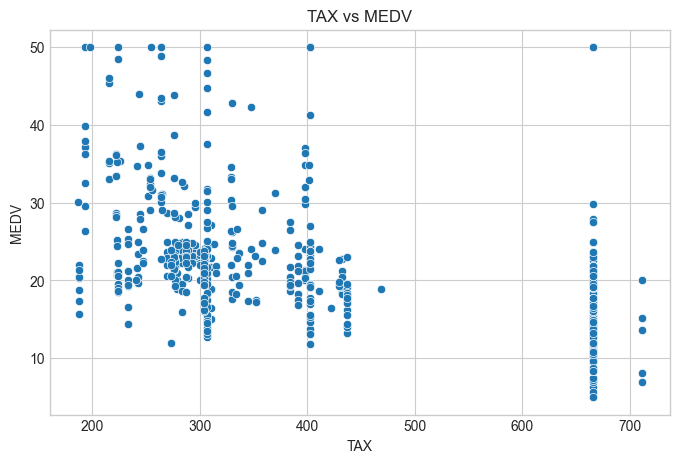

In [268]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=dysfunctional_niggers['TAX'], y=dysfunctional_niggers['MEDV'])
plt.title(f'TAX vs MEDV')
plt.xlabel('TAX')
plt.ylabel('MEDV')
plt.show()

Видно: при увеличении признака tax, цена умеренно снижается

Вывод: Все выбранные признаки демонстрируют связь с целевой переменной. Признак indus имеет вымпел (то вверх, то вниз), поэтому он тоже будет исключен . Признак tax неявно демонстрирует, поэтому он будет исключен

In [269]:
new_selected_features = corr_with_sign[1:4].index.tolist()
print(f"Choosed: {new_selected_features}")

Choosed: ['LSTAT', 'RM', 'PTRATIO']


### 9. Формирование наборов данных
Создадим переменную X (факторные признаки).

In [270]:
X = dysfunctional_niggers[new_selected_features]
X.shape

(506, 3)

Создадим переменную y (целевая переменная)

In [271]:
y = dysfunctional_niggers['MEDV']
y.shape

(506,)

### 10. Разбиение данных
Разделим данные на обучающую и тестовую выборки в соотношении 80:20.

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10000000)

print(f"Train shape: {X_train.shape[0]}")
print(f"Train data: {X_train}")
print(f"Test shape: {X_test.shape[0]} ")
print(f"Test data: {X_test} ")

Train shape: 404
Train data:      LSTAT     RM  PTRATIO
231   5.25  7.412     17.4
402  20.31  6.404     20.2
39    4.32  6.595     18.3
226   3.13  8.040     17.4
220   9.71  6.951     17.4
..     ...    ...      ...
349   5.89  6.939     19.7
196   4.08  7.287     12.6
100   9.42  6.727     20.9
344   4.61  6.874     17.6
67    8.10  5.878     18.9

[404 rows x 3 columns]
Test shape: 102 
Test data:      LSTAT     RM  PTRATIO
310  12.64  4.973     18.4
140  24.16  6.174     21.2
341   5.49  7.241     15.5
173   9.04  6.416     16.6
147  29.53  4.926     14.7
..     ...    ...      ...
72    5.52  6.065     19.2
195   2.97  7.875     14.4
41    4.84  6.770     17.9
25   16.51  5.599     21.0
208  14.66  6.064     18.6

[102 rows x 3 columns] 


### 11-13. Обучение модели и оценка качества
Обучим модель линейной регрессии и оценим её качество с помощью R² и RMSE.

In [273]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)



print("Прогнозные значения на обучающей выборке (первые 10):", ", ".join(f"{val:.1f}" for val in y_train_pred[:10]))
print("Реальные значения на этой выборке (первые 10):       ", ", ".join(f"{val:.1f}" for val in y_train[:10]))

print("Прогнозные значения на тестовой выборке (первые 10):", ", ".join(f"{val:.1f}" for val in y_test_pred[:10]))
print("Реальные значения на этой выборке (первые 10):       ", ", ".join(f"{val:.1f}" for val in y_test[:10]))
print()


Прогнозные значения на обучающей выборке (первые 10): 32.7, 16.8, 28.9, 36.7, 27.9, 11.8, 22.6, 13.7, 19.1, 24.7
Реальные значения на этой выборке (первые 10):        31.7, 12.1, 30.8, 37.6, 26.7, 12.7, 20.0, 13.4, 14.1, 28.1
Прогнозные значения на тестовой выборке (первые 10): 16.7, 12.7, 33.3, 26.7, 9.2, 19.1, 20.1, 18.7, 18.1, 22.1
Реальные значения на этой выборке (первые 10):        16.1, 14.0, 32.7, 23.6, 14.6, 26.4, 13.4, 14.1, 15.4, 21.2



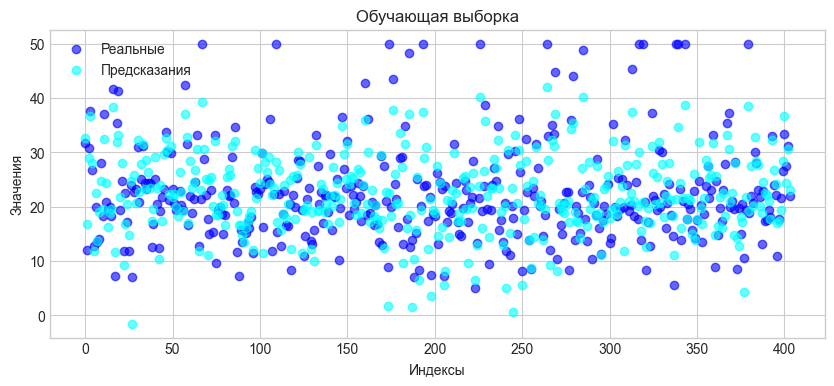

In [274]:
plt.figure(figsize=(10, 4))
plt.scatter(range(len(y_train)), y_train, label='Реальные', color='blue', alpha=0.6)
plt.scatter(range(len(y_train_pred)), y_train_pred, label='Предсказания', color='cyan', alpha=0.6)
plt.title('Обучающая выборка')
plt.xlabel('Индексы')
plt.ylabel('Значения')
plt.legend()
plt.show()

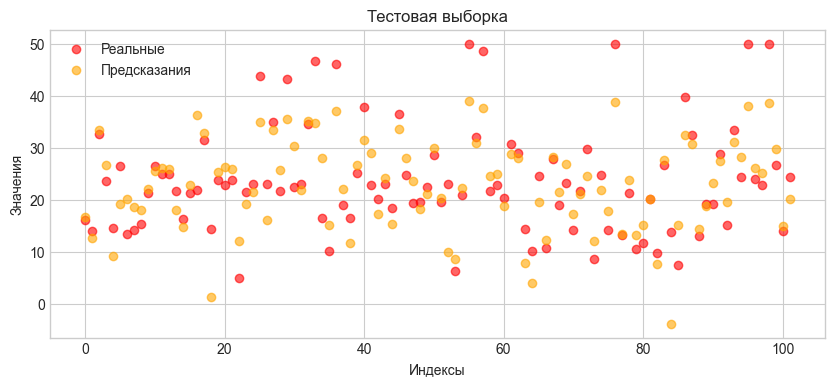

In [275]:
plt.figure(figsize=(10, 4))
plt.scatter(range(len(y_test)), y_test, label='Реальные', color='red', alpha=0.6)
plt.scatter(range(len(y_test_pred)), y_test_pred, label='Предсказания', color='orange', alpha=0.6)
plt.title('Тестовая выборка')
plt.xlabel('Индексы')
plt.ylabel('Значения')
plt.legend()
plt.show()

In [276]:
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print(f"R² on train {r2_train:.4f}")
print(f"RMSE on train: {rmse_train:.4f}")
print(f"R² on test: {r2_test:.4f}")
print(f"RMSE on test: {rmse_test:.4f}")

R² on train 0.6646
RMSE on train: 5.1516
R² on test: 0.7118
RMSE on test: 5.4751


R² показывает, какая доля вариации целевой переменной объясняется (предсказывается) моделью. Значение около 0.66–0.71 означает, что модель объясняет (предсказывает) примерно 66–71% вариации данных. Чем ближе R² к 1, тем лучше модель подходит к данным.

RMSE показывает среднюю величину ошибки предсказаний модели в тех же единицах, что и целевая переменная. Чем меньше значение RMSE, тем точнее модель. Здесь ошибки примерно равны 5.15–5.48 единицам.

### 14. Анализ выбросов в целевом признаке
Построим диаграмму boxplot для мединны чтобы найти выбросы.

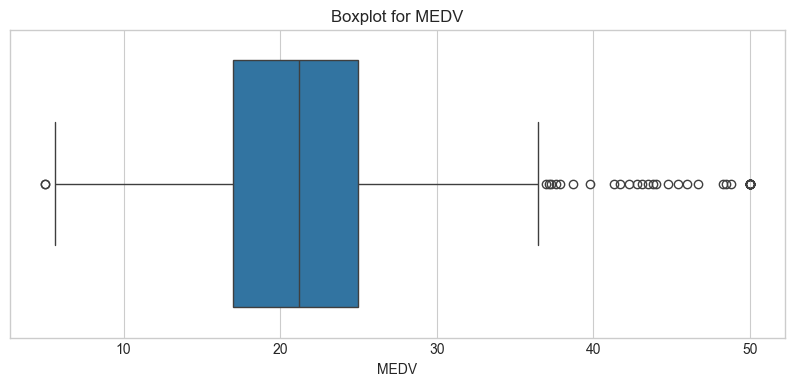

In [277]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=dysfunctional_niggers['MEDV'])
plt.title('Boxplot for MEDV')
plt.xlabel('MEDV')
plt.show()

Вывод: Из диаграммы видно, что значения выше примерно 37 и ниже примерно 4 можно считать выбросами. Особенно заметна группа значений, равных 50.0.

### 15. Удаление выбросов и переобучение модели
Отфильтруем данные, удалив дома со стоимостью 37.5 тыс. $, и заново обучим модель.

In [278]:
data_filtered = dysfunctional_niggers[(dysfunctional_niggers['MEDV'] < 37.5) & (dysfunctional_niggers['MEDV'] > 4.0) ]

X_f = data_filtered[new_selected_features]
y_f = data_filtered['MEDV']

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, random_state=10000000)

model_lr_filtered = LinearRegression()
model_lr_filtered.fit(X_train_f, y_train_f)

y_test_pred_f = model_lr_filtered.predict(X_test_f)
r2_test_f = r2_score(y_test_f, y_test_pred_f)
rmse_test_f = np.sqrt(mean_squared_error(y_test_f, y_test_pred_f))

print("--- Resulsts after clear ---")
print(f"R² on test: {r2_test_f:.4f}")
print(f"RMSE on test: {rmse_test_f:.4f}")

--- Resulsts after clear ---
R² on test: 0.6967
RMSE on test: 3.6264


Сравнение и вывод:
*   R² Уменьшился с 0.7118 до 0.6967.
*   RMSE уменьшился с 5.4751 до 3.6264.

Видно, что модель чуть хуже объясняет цены, но зато уменьшила величину ошибочных значений. Удаление выбросов позволило построить более точную модель.

### 16. Гребневая регрессия (Ridge)


In [279]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train_f, y_train_f)

y_test_pred_ridge = model_ridge.predict(X_test_f)
r2_test_ridge = r2_score(y_test_f, y_test_pred_ridge)
rmse_test_ridge = np.sqrt(mean_squared_error(y_test_f, y_test_pred_ridge))

print("--- Ridge ---")
print(f"R² on test: {r2_test_ridge:.4f}")
print(f"RMSE on test: {rmse_test_ridge:.4f}")

--- Ridge ---
R² on test: 0.6964
RMSE on test: 3.6278


Вывод: Разница между гребневой регрессией и линейной совсем не существенна, потому что гребневая основывается на большом количестве переменных, а у нас их всего 3. Этот метод особенно полезен для решения проблемы мультиколлинеарности в линейной регресии, а у нас этой проблемы нет.

### 17. Полиномиальная регрессия
Построим полиномиальную регрессию 3-й степени.

In [280]:
poly_model = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), LinearRegression())

poly_model.fit(X_train_f, y_train_f)

y_test_pred_poly = poly_model.predict(X_test_f)
r2_test_poly = r2_score(y_test_f, y_test_pred_poly)
rmse_test_poly = np.sqrt(mean_squared_error(y_test_f, y_test_pred_poly))

print("--- Resulst for polynomial regression ---")
print(f"R² on test: {r2_test_poly:.4f}")
print(f"RMSE on test: {rmse_test_poly:.4f}")

--- Resulst for polynomial regression ---
R² on test: 0.7814
RMSE on test: 3.0787


## Итоговое сравнение результатов
Сведем все полученные метрики на тестовых данных в одну таблицу для наглядности.

In [281]:
results = pd.DataFrame({
    'Model': [
        'Линейная регрессия (с выбросами)',
        'Линейная регрессия (без выбросов)',
        'Гребневая регрессия (без выбросов)',
        'Полиномиальная регрессия (без выбросов)'
    ],
    'R2 (test)': [r2_test, r2_test_f, r2_test_ridge, r2_test_poly],
    'RMSE (test)': [rmse_test, rmse_test_f, rmse_test_ridge, rmse_test_poly]
}).round(4).sort_values(by='R2 (test)', ascending=False)

print(results)

                                     Model  R2 (test)  RMSE (test)
3  Полиномиальная регрессия (без выбросов)     0.7814       3.0787
0         Линейная регрессия (с выбросами)     0.7118       5.4751
1        Линейная регрессия (без выбросов)     0.6967       3.6264
2       Гребневая регрессия (без выбросов)     0.6964       3.6278


### Общий вывод:
1.   Удаление выбросов **критически важно**. Оно позволило значительно улучшить качество модели, уменьшив RMSE с 5.4751 до 3.6264.
2.   Ridge регуляризация не дала существенного прироста качества, что говорит об отсутствии сильного переобучения в линейной модели.
3. Полиномиальная регрессия 3-й степени показала наилучший результат. R² достиг 0.7814 , а ошибка RMSE снизилась до 3.0787. Это объясняется тем, что взаимосвязи между признаками (особенно LSTAT) и ценой не являются строго линейными. Полиномиальная модель смогла уловить эти нелинейные зависимости, что привело к более точным предсказаниям.

